# 1.

In [3]:
import pandas as pd
import plotly.express as px

pingees = pd.read_csv(r"https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv").dropna()

adelie = pingees[pingees['species'] == 'Adelie']
gentoo = pingees[pingees['species'] == 'Gentoo']
chinstrap = pingees[pingees['species'] == 'Chinstrap']

data = {
    'Adelie' : (adelie, adelie.describe()['flipper_length_mm']),
    'Gentoo' : (gentoo, gentoo.describe()['flipper_length_mm']),
    'Chinstrap' : (chinstrap, chinstrap.describe()['flipper_length_mm'])
}

# data

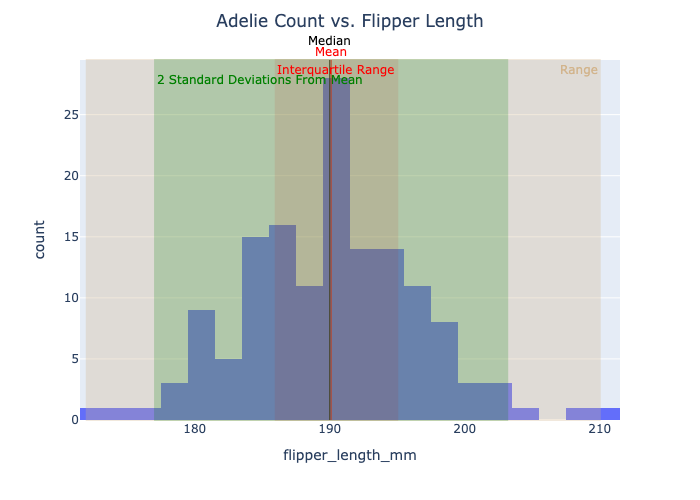

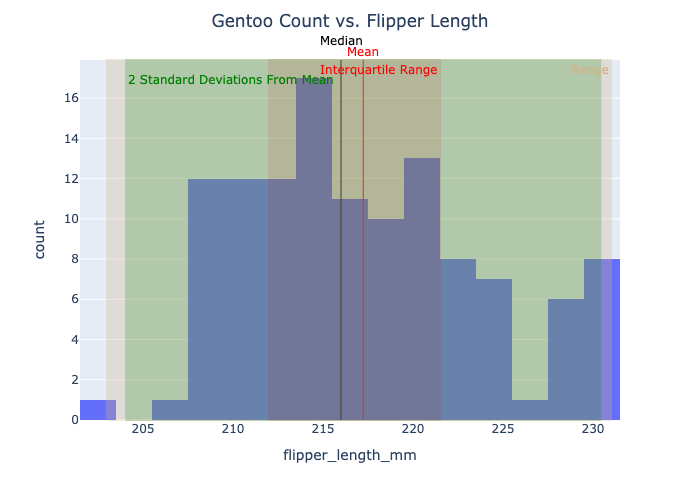

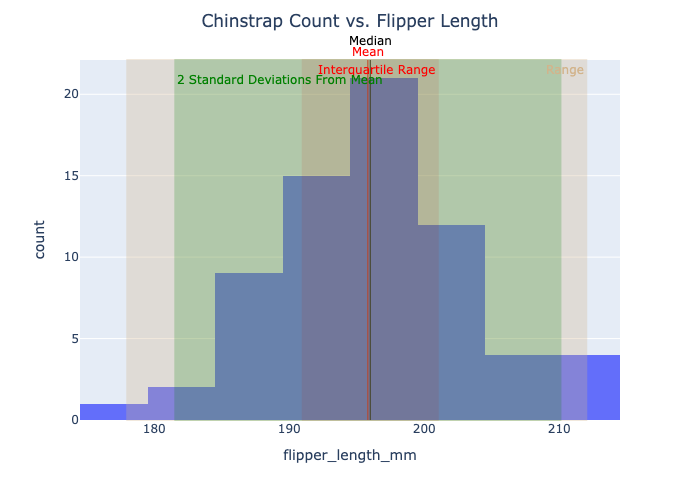

In [164]:
for key in data:
    df, describe = data.get(key)
    fig = px.histogram(df, x='flipper_length_mm')
    fig.add_vline(x=describe['mean'], line_width=1, line_color='red', annotation=dict(text='Mean', xanchor='center', y=1.05, font=dict(size=12, color='red')))
    fig.add_vline(x=describe['50%'], line_width=1, line_color='black', annotation=dict(text='Median', xanchor='center', y=1.08, font=dict(size=12, color='black')))

    fig.add_vrect(x0=describe['min'], x1=describe['max'], line_color='tan', fillcolor='tan',opacity=0.3, annotation=dict(text='Range', font=dict(color='tan')))
    fig.add_vrect(x0=describe['25%'], x1=describe['75%'], line_color='red', fillcolor='red',opacity=0.1, annotation=dict(text='Interquartile Range', font=dict(color='red')))
    fig.add_vrect(
        x0=describe['mean'] - 2 * describe['std'],
        x1=describe['mean'] + 2 * describe['std'],
        line_color='green', fillcolor='green',opacity=0.2,
        annotation=dict(
            text='2 Standard Deviations From Mean',
            x=describe['mean'] - 2 * describe['std'],
            xanchor='left', yshift=-10, font=dict(color='green')
        )
    )

    fig.update_layout(title=dict(text=f"{key} Count vs. Flipper Length", x=0.5, y=0.97, xanchor="center", yanchor="top"))

    # fig.show()
    fig.show(renderer='png')

# 2.

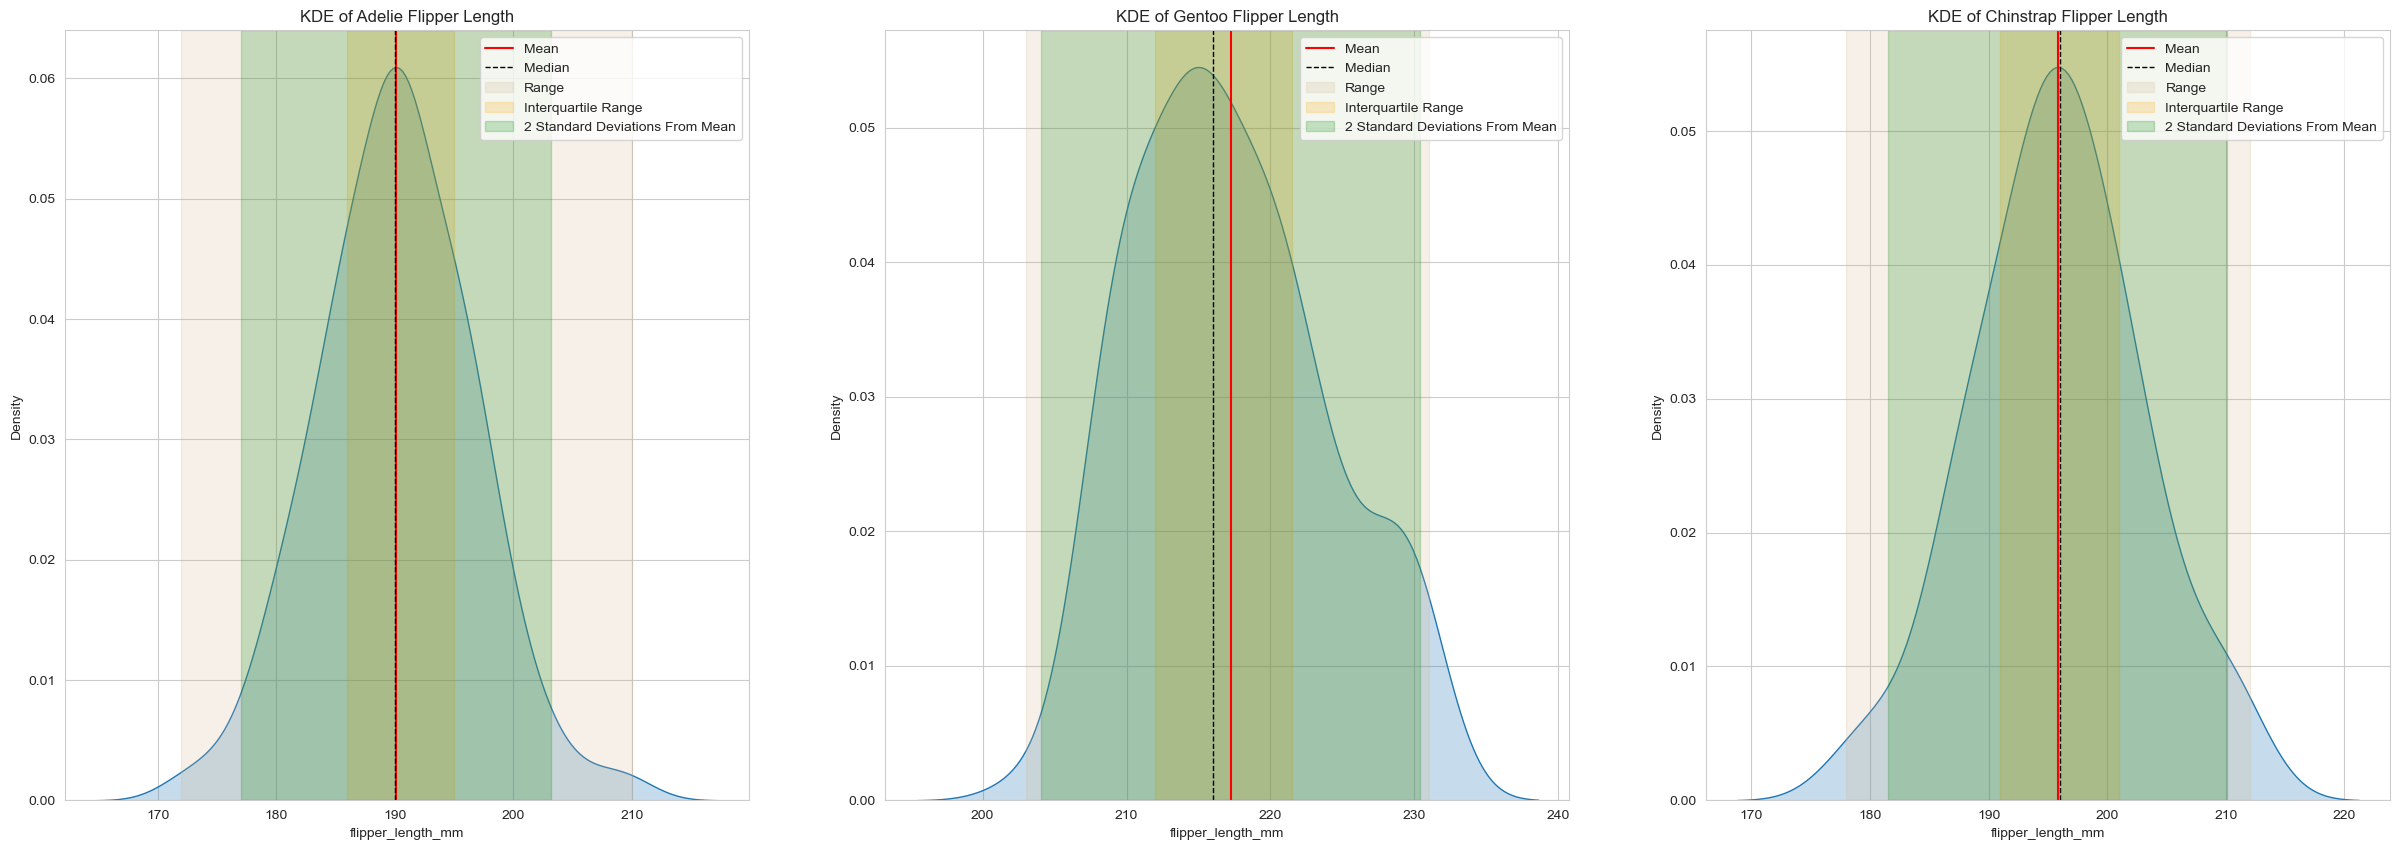

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for i, key in enumerate(data.keys()):
    df, describe = data.get(key)

    sns.kdeplot(data=df, x="flipper_length_mm", fill=True, ax=axes[i])
    axes[i].axvline(x=describe['mean'], color='red', linewidth=1.5, label='Mean')
    axes[i].axvline(x=describe['50%'], color='black', linewidth=1, linestyle='dashed', label='Median')

    axes[i].axvspan(xmin=describe['min'], xmax=describe['max'], color='tan', alpha=0.2, label='Range')
    axes[i].axvspan(xmin=describe['25%'], xmax=describe['75%'], color='orange', alpha=0.2, label='Interquartile Range')
    axes[i].axvspan(
        xmin=describe['mean'] - 2 * describe['std'],
        xmax=describe['mean'] + 2 * describe['std'],
        color='green', alpha=0.2, label='2 Standard Deviations From Mean'
    )

    axes[i].legend()
    axes[i].set_title(f"KDE of {key} Flipper Length")

plt.show()

# 3.
I prefer the kernel density estimator because it provides all the necessary information and I think it is the most visually appealing graphs to me because of the smooth lines. The box plot can roughly show the distribution of data with the box as well as indicate any outliars with the wiskers, the KDE does the same thing as the probability density is indicated on the y-axis. The histogram counts the number of occurances by grouping the data into bins, but the same thing can be calculated by the probability density function given the total number of entries, additionally, the amount of details in the histogram is dependent on the size of the bins, which can be a limiting factor. 

Summary of Interactions:
1. Plotly - Adding Vertical Lines and Legends:

You asked about using Plotly’s add_vline() function. I explained how to add vertical lines, adjust text annotations, and customize their position and color.
You later wanted to include these annotations (like vertical lines and rectangles) in the legend. Since add_vline() and add_vrect() don't automatically generate legend entries, I provided a solution using dummy traces to manually add annotations to the legend.
Box Plots, Histograms, and KDEs:

2. We discussed the key features and strengths of different plot types:
Box Plots: Great for visualizing quartiles and identifying outliers.
Histograms: Useful for showcasing frequency distributions of values.
KDEs (Kernel Density Estimation): Best for representing a smoothed probability density of data.
Seaborn and Matplotlib - Annotations and Legends:

3. You wanted to know how to add lines and boxes (like axvline, axvspan, and Rectangle()) to Seaborn or Matplotlib plots for annotations. I showed how to use these methods for visual highlights and create legends for these annotations.
I also provided examples of how to arrange multiple KDE plots in rows and display plots as PNG images directly within Jupyter notebooks.
Plotly Express - Adding Legends:

4. We discussed adding legends to Plotly Express plots. I explained that since add_vline() and add_vrect() do not automatically generate legends, you can create dummy traces to make them appear in the legend.
General Plot Customization:

5. We covered various techniques for customizing plots, including adding titles, adjusting the position of annotations, and managing legends to better interpret the plots.

Link: https://chatgpt.com/share/66f0d90e-5f98-8011-8157-6b4dc7e14cca

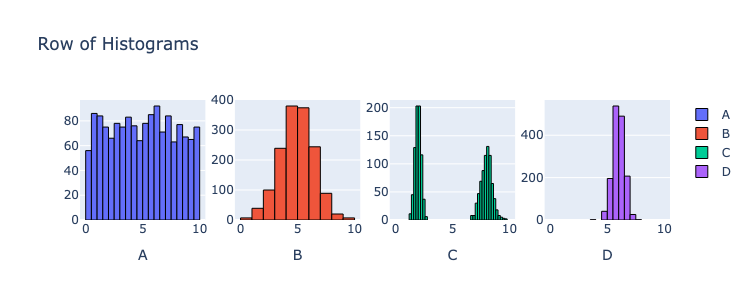

In [1]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# 4.
1. A and C
2. A and B, B and C
3. B and D
4. A and D, C and D

# 5.
Right skewedness is when the mean is pulled to the right (became larger) so that the mean is greater than the median, although the majority of the values within the dataset are concentrated on the left side of center, the existance of some large outliar values forms a long tail on the right side of center (as shown in the image below). These large outliar values increases the mean but not the median as the median is the middle number that divides the data in half, it would stay near the center of where the bulk of the data is located and is not significantly affected by the small amount of outliars.

Mean: 3.9506255290241152 Median: [3.26425489]


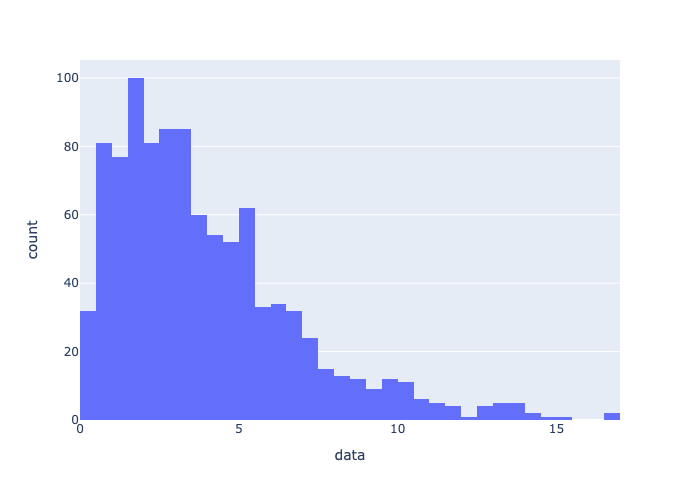

In [175]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

print(f'Mean: {sample1.mean()} Median: {np.quantile(sample1, [0.5])}')
fig1.show(renderer="png")

Similarly left skewedness is when the mean is pulled to the left (became smaller) so that the mean is smaller than the median. This is caused by a similar reason, but this time due to a tail of small values on the left side of center (as shown in the image below). These small values decreases the mean but it does not significantly affect the median due to the same reason.

Mean: -4.153064874017952 Median: [-3.41761673]


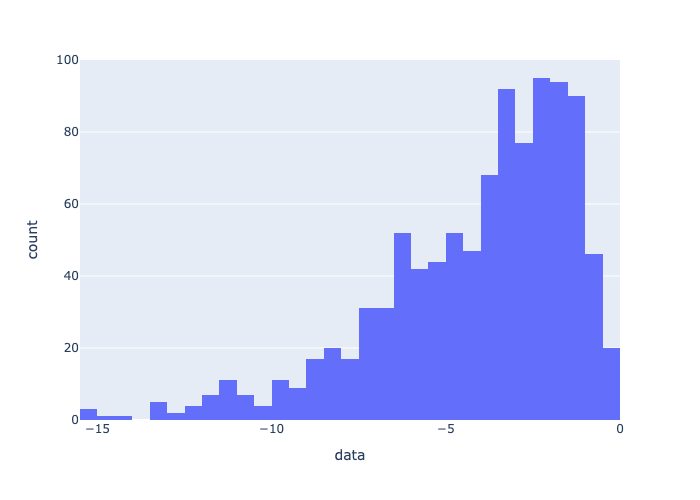

In [176]:
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data':sample2}), x='data')

print(f'Mean: {sample2.mean()} Median: {np.quantile(sample2, [0.5])}')
fig2.show(renderer="png")

Summary of Interactions:
Exploration of Mean, Median, and Skewness:

You asked for an explanation of the relationship between the mean, median, and skewness (right and left skewness).
I explained that:
In a right-skewed distribution (positive skew), the mean is greater than the median because the mean is pulled toward the higher values in the tail.
In a left-skewed distribution (negative skew), the mean is less than the median because the mean is influenced by extreme low values.
In a symmetric distribution, the mean and median are equal since there is no skewness pulling the mean in any direction.
I also provided reasoning for why this happens: the mean is sensitive to outliers and extremes, whereas the median is resistant to them.
Explanation of Python Code Using scipy, pandas, and numpy:

You provided a code snippet and asked for an explanation of what it does.
I explained that the code:
Imports necessary libraries (scipy, pandas, numpy).
Generates a sample of 1,000 random values from a gamma distribution and stores it in sample1.
Creates a histogram of sample1 using Plotly Express (assumed to be imported elsewhere).
Calculates the mean and median of sample1.
Generates a second sample, sample2, by negating the values of another 1,000 random values drawn from the gamma distribution, effectively creating a left-skewed (negative) distribution.
This summary captures the core discussions we had regarding statistical concepts and the explanation of the provided code.

Link: https://chatgpt.com/share/66f1ddb7-aa04-8011-9099-bfda1e530990

# 6.

In [204]:
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv").dropna()
# df.dtypes
d = df.describe()['calories']

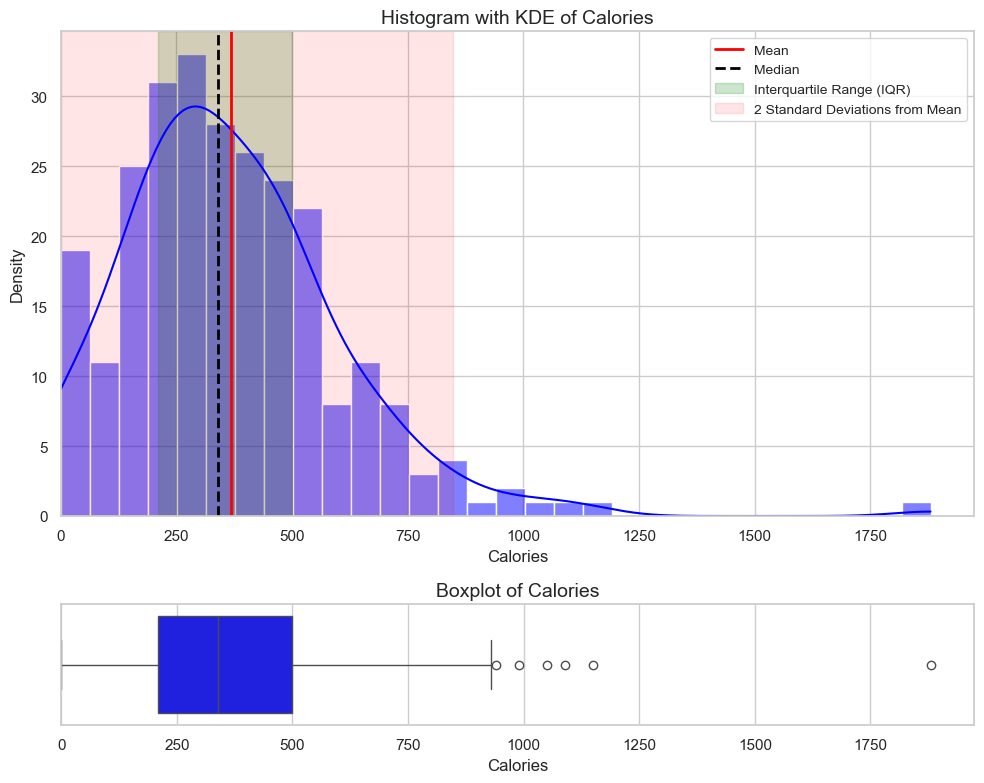

In [213]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Create a figure with two subplots: one for the histogram/KDE, one for the boxplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Plot the histogram with KDE on the first subplot (ax1)
sns.histplot(df['calories'], kde=True, ax=ax1, bins=30, color='blue')
ax1.set_title('Histogram with KDE of Calories', fontsize=14)
ax1.set_xlabel('Calories', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)

ax1.set_xlim(left=0)

# Add vertical lines for the mean and median
ax1.axvline(x=d['mean'], color='red', linewidth=2, label='Mean')
ax1.axvline(x=d['50%'], color='black', linewidth=2, linestyle='dashed', label='Median')

# Highlight the range, IQR, and 2 standard deviations from the mean with distinct colors
# ax1.axvspan(xmin=d['min'], xmax=d['max'], color='#C44E52', alpha=0.3, label='Range')  # Reddish for range
ax1.axvspan(xmin=d['25%'], xmax=d['75%'], color='green', alpha=0.2, label='Interquartile Range (IQR)')
ax1.axvspan(
    xmin=d['mean'] - 2 * d['std'],
    xmax=d['mean'] + 2 * d['std'],
    color='red', alpha=0.1, label='2 Standard Deviations from Mean'
)

# Add a legend to distinguish each element
ax1.legend(loc='upper right', fontsize=10)

# Plot the box plot on the second subplot (ax2)
sns.boxplot(x=df['calories'], ax=ax2, color='blue')
ax2.set_title('Boxplot of Calories', fontsize=14)
ax2.set_xlabel('Calories', fontsize=12)

ax2.set_xlim(left=-1)

# Adjust the layout so the plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

Summary of Our Interaction:
Dataset Setup:

You provided a dataset URL: https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv.
I assisted in loading the dataset into a pandas DataFrame using pd.read_csv() and helped you generate a plot with a histogram, KDE, and a box plot.
Initial Python Code for Plot:

I provided code to create two subplots:
A histogram with KDE on the top.
A box plot on the bottom.
Key functions used included sns.histplot() for the histogram with KDE and sns.boxplot() for the box plot.
X-axis Adjustment:

You asked how to make the x-axis start at 0. I updated the code by adding ax1.set_xlim(left=0) and ax2.set_xlim(left=0) to ensure the x-axis for both the histogram/KDE and the box plot started at 0.
Color Customization:

You provided your updated code, where you plotted the histogram with additional vertical lines and spans for statistical summaries (mean, median, range, interquartile range, and standard deviations).
I refined your code by adjusting the colors of each component (histogram, KDE, mean, median, etc.) for better contrast.
Further Color Improvements:

After feedback that the colors still looked "weird," I provided a new version with more distinct and complementary colors to make each component stand out. Key changes included:
Deep blue for the histogram.
Orange for the mean.
Green for the median (dashed line).
Reddish for the range.
Purple for the IQR.
Cyan for the standard deviation.
Bright yellow for the box plot.

Link: https://chatgpt.com/share/66f21d81-b9e0-8011-97c6-7ce7ac8cff04

# 7. 

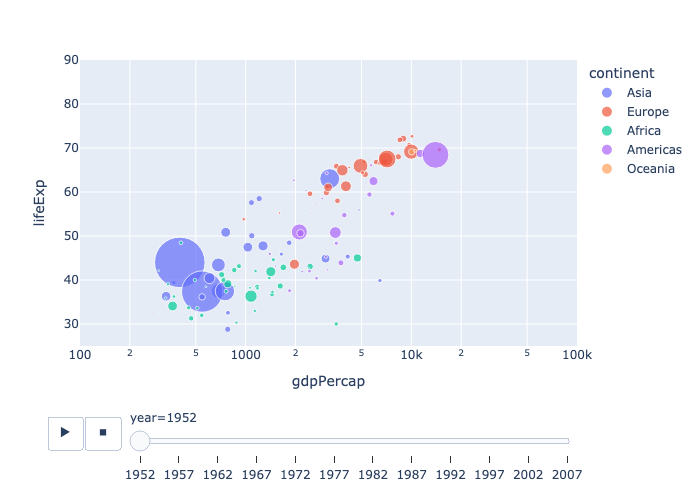

In [4]:
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90]).show(renderer='png')

# 8.

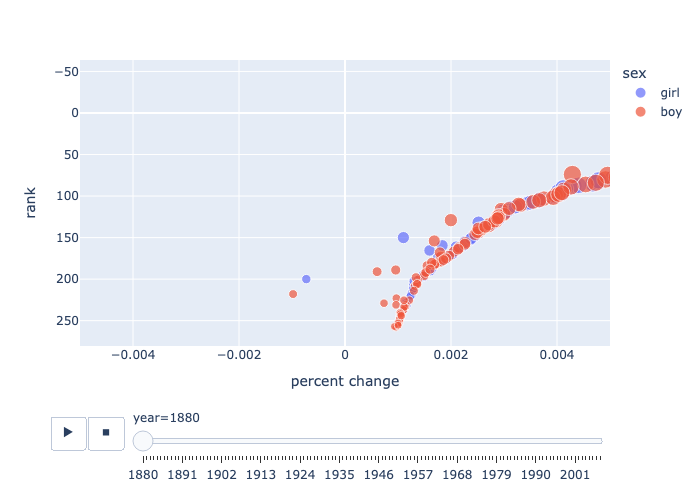

In [217]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names

fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
           size="percent", color="sex", hover_name="name",
           size_max=50, range_x=[-0.005,0.005])

fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
# fig.show()
fig.show(renderer='png')

# 9. 
I haven't reviewed the course wiki-textbook but I have interacted with a ChatBot.